<a href="https://colab.research.google.com/github/jathusharini/DSGP_Group_03/blob/main/Final_MediaPipeSSL_Pickle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Installing and importing necessary libraries


import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import pickle
import tensorflow as tf
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder


In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

# Giving list of words
words = ['angry','bank', 'brother','bye','excuse me','father', 'good evening', 'good morning', 'good night', 'happy','hello', 'help','home', 'hospital','how much', 'hungry','love', 'mother', 'police station', 'sad', 'school', 'sister','sorry','thankyou', 'welcome', 'what', 'when', 'where', 'who','why']
len(words)

30

In [ ]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
dic = {}
with mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5) as hands:
    for word in words:
        dire = os.path.join('/content/drive/MyDrive/MediaPipe_Data/Dataset_MediPipe/src_2', word)
        vids = os.listdir(dire)
        vid_no = 0
        print(word)
        dic[word] = []
        for i,vid in enumerate(vids):
            dic[word].append([])
            vidcap = cv2.VideoCapture(os.path.join('/content/drive/MyDrive/MediaPipe_Data/Dataset_MediPipe/src_2', word, vid))
            success,frame = vidcap.read()
            count = 0
            while success:     
                success,frame = vidcap.read()
                if success:
                    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    results = hands.process(image)
                    if results.multi_hand_landmarks:
                        # Loop through each hand landmark in the list
                        for hand_landmarks in results.multi_hand_landmarks:
                            # Get the landmarks for the hand
                            landmarks = hand_landmarks.landmark
                            landmarks_array = np.array([[landmark.x, landmark.y, landmark.z] for landmark in landmarks])
                            # Store the landmarks in the dataset array                             
                            dic[word][i].append(landmarks_array.flatten())
                            # Draw the hand landmarks on the image for visualization
                            mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                
            vid_no +=1

# create a binary pickle file 
f = open("/content/drive/MyDrive/MediaPipe_Data/Dataset_PKL_MediaPipe/preprocessed_all.pkl","wb")
pickle.dump(dic,f)
print("Successfuly transfered")
f.close()
        

angry
bank
brother
bye
excuse me
father
good evening
good morning
good night
happy
hello
help
home
hospital
how much
hungry
love
mother
police station
sad
school
sister
sorry
thankyou
welcome
what
when
where
who
why
Successfuly transfered


Start running from here

In [5]:
with open('preprocessed_model.pkl', 'rb') as f:
    data = pickle.load(f)
print("reading is successful")

def stretch(video, size):
    arr = np.array(video)
    n = len(arr)
    x = np.linspace(0, n - 1, n)
    new_x = np.linspace(0, n - 1, size)
    new_arr = np.zeros((size, len(video[0])))
    for i in range(size):
        new_arr[:, i] = np.interp(new_x, x, arr[:, i])
    
    return new_arr

reading is successful


In [6]:
for key in data.keys():
    print(key, len(data[key][1]))

angry 17
bank 109
brother 32
bye 38
excuse me 65
father 31
good evening 56
good morning 65
good night 74
happy 52
hello 34
help 60
home 19
hospital 103
how much 10
hungry 21
love 41
mother 30
police station 118
sad 27
school 75
sister 24
sorry 51
thankyou 23
welcome 35
what 17
when 29
where 9
who 19
why 24


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

src_2 = {} 
for key in data.keys():
    arr = data[key]
    src_2[key] = []
    for vid in arr:
        if len(vid) !=0 :
            src_2[key].append(stretch(vid, 63))

minn = 200
for arr in src_2.values():
    for ar in arr:
        minn = min(minn, len(ar))
        
print(minn)

src_3 = {}
for key in src_2.keys():
    if len(src_2[key]) <= 63 and len(src_2[key]) >= 10:
        src_3[key] = src_2[key]

for key in src_3.keys():
    print(key, len(src_3[key]))



63
angry 25
bank 25
brother 25
bye 25
excuse me 25
father 25
good evening 25
good morning 25
good night 25
happy 25
hello 25
help 25
home 25
hospital 25
how much 25
hungry 25
love 25
mother 25
police station 25
sad 25
school 25
sister 25
sorry 25
thankyou 25
welcome 25
what 25
when 25
where 25
who 25
why 25


In [8]:
# create a binary pickle file 
f = open("/content/drive/MyDrive/MediaPipe_Data/Dataset_PKL_MediaPipe/framed_all.pkl","wb")
pickle.dump(src_3,f)
print("Successfuly transfered")
f.close()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/MediaPipe_Data/Dataset_PKL_MediaPipe/framed_all.pkl'

In [9]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

#words = src_3.keys()

words = src_2.keys()

label_map = {label:num for num, label in enumerate(words)}

print('label map: ', label_map)


label map:  {'angry': 0, 'bank': 1, 'brother': 2, 'bye': 3, 'excuse me': 4, 'father': 5, 'good evening': 6, 'good morning': 7, 'good night': 8, 'happy': 9, 'hello': 10, 'help': 11, 'home': 12, 'hospital': 13, 'how much': 14, 'hungry': 15, 'love': 16, 'mother': 17, 'police station': 18, 'sad': 19, 'school': 20, 'sister': 21, 'sorry': 22, 'thankyou': 23, 'welcome': 24, 'what': 25, 'when': 26, 'where': 27, 'who': 28, 'why': 29}


In [10]:
print("bye: ", src_3['bye'][0][0][0])

bye:  0.39737629890441895


In [11]:

sequences, labels = [], []
for word in words:
    for i,sequence in enumerate(src_3[word]):
        window = src_3[word][i][:63]
        sequences.append(np.asarray(window).astype('float32'))
        labels.append(label_map[word])
    

print('sequence shape: ', np.array(sequences).shape)

print("label shape: ", np.array(labels).shape)


sequence shape:  (750, 63, 63)
label shape:  (750,)


In [12]:
X = np.array(sequences)

print("array shape: ", X.shape)

array shape:  (750, 63, 63)


In [13]:
y = to_categorical(labels).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("y_test shape: ", y_test.shape)

y_test shape:  (150, 30)


In [14]:
print("X_train shape: ", X_train.shape)

X_train shape:  (600, 63, 63)


In [15]:
from tensorflow.keras.callbacks import TensorBoard

log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)



#New model

* src_2 = accuracy :    (Before removing frames)
* src_3 = accuracy : 92 (Unnessacary frames removed) : saved as "model" : Final_tf_mp_model

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import matplotlib.pyplot as plt

# Create the model
model = tf.keras.models.Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(len(words), activation='softmax')
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['categorical_accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])


Epoch 1/2000
19/19 [==============================] - 2s 15ms/step - loss: 3.3934 - categorical_accuracy: 0.0400
Epoch 2/2000
19/19 [==============================] - 0s 14ms/step - loss: 3.1450 - categorical_accuracy: 0.1133
Epoch 3/2000
19/19 [==============================] - 0s 14ms/step - loss: 2.8893 - categorical_accuracy: 0.1867
Epoch 4/2000
19/19 [==============================] - 0s 15ms/step - loss: 2.6458 - categorical_accuracy: 0.2883
Epoch 5/2000
19/19 [==============================] - 0s 12ms/step - loss: 2.4380 - categorical_accuracy: 0.3200
Epoch 6/2000
19/19 [==============================] - 0s 15ms/step - loss: 2.2384 - categorical_accuracy: 0.3867
Epoch 7/2000
19/19 [==============================] - 0s 13ms/step - loss: 2.0905 - categorical_accuracy: 0.4350
Epoch 8/2000
19/19 [==============================] - 0s 13ms/step - loss: 1.9370 - categorical_accuracy: 0.4367
Epoch 9/2000
19/19 [==============================] - 0s 14ms/step - loss: 1.8362 - categorical_

19/19 [==============================] - 0s 13ms/step - loss: 0.0789 - categorical_accuracy: 0.9833
Epoch 144/2000
19/19 [==============================] - 0s 14ms/step - loss: 0.0727 - categorical_accuracy: 0.9867
Epoch 145/2000
19/19 [==============================] - 0s 15ms/step - loss: 0.0690 - categorical_accuracy: 0.9900
Epoch 146/2000
19/19 [==============================] - 0s 13ms/step - loss: 0.0739 - categorical_accuracy: 0.9917
Epoch 147/2000
19/19 [==============================] - 0s 14ms/step - loss: 0.0710 - categorical_accuracy: 0.9867
Epoch 148/2000
19/19 [==============================] - 0s 14ms/step - loss: 0.0655 - categorical_accuracy: 0.9933
Epoch 149/2000
19/19 [==============================] - 0s 13ms/step - loss: 0.0637 - categorical_accuracy: 0.9917
Epoch 150/2000
19/19 [==============================] - 0s 12ms/step - loss: 0.0628 - categorical_accuracy: 0.9950
Epoch 151/2000
19/19 [==============================] - 0s 13ms/step - loss: 0.0650 - categoric

19/19 [==============================] - 0s 14ms/step - loss: 0.0147 - categorical_accuracy: 1.0000
Epoch 286/2000
19/19 [==============================] - 0s 13ms/step - loss: 0.0148 - categorical_accuracy: 1.0000
Epoch 287/2000
19/19 [==============================] - 0s 14ms/step - loss: 0.0127 - categorical_accuracy: 1.0000
Epoch 288/2000
19/19 [==============================] - 0s 14ms/step - loss: 0.0133 - categorical_accuracy: 1.0000
Epoch 289/2000
19/19 [==============================] - 0s 14ms/step - loss: 0.0181 - categorical_accuracy: 0.9983
Epoch 290/2000
19/19 [==============================] - 0s 15ms/step - loss: 0.0138 - categorical_accuracy: 1.0000
Epoch 291/2000
19/19 [==============================] - 0s 14ms/step - loss: 0.0124 - categorical_accuracy: 1.0000
Epoch 292/2000
19/19 [==============================] - 0s 14ms/step - loss: 0.0126 - categorical_accuracy: 1.0000
Epoch 293/2000
19/19 [==============================] - 0s 13ms/step - loss: 0.0169 - categoric

19/19 [==============================] - 0s 14ms/step - loss: 0.0038 - categorical_accuracy: 1.0000
Epoch 428/2000
19/19 [==============================] - 0s 14ms/step - loss: 0.0040 - categorical_accuracy: 1.0000
Epoch 429/2000
19/19 [==============================] - 0s 13ms/step - loss: 0.0037 - categorical_accuracy: 1.0000
Epoch 430/2000
19/19 [==============================] - 0s 13ms/step - loss: 0.0036 - categorical_accuracy: 1.0000
Epoch 431/2000
19/19 [==============================] - 0s 13ms/step - loss: 0.0036 - categorical_accuracy: 1.0000
Epoch 432/2000
19/19 [==============================] - 0s 13ms/step - loss: 0.0036 - categorical_accuracy: 1.0000
Epoch 433/2000
19/19 [==============================] - 0s 13ms/step - loss: 0.0035 - categorical_accuracy: 1.0000
Epoch 434/2000
19/19 [==============================] - 0s 13ms/step - loss: 0.0035 - categorical_accuracy: 1.0000
Epoch 435/2000
19/19 [==============================] - 0s 12ms/step - loss: 0.0036 - categoric

19/19 [==============================] - 0s 13ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 570/2000
19/19 [==============================] - 0s 13ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 571/2000
19/19 [==============================] - 0s 13ms/step - loss: 0.0022 - categorical_accuracy: 1.0000
Epoch 572/2000
19/19 [==============================] - 0s 12ms/step - loss: 0.0017 - categorical_accuracy: 1.0000
Epoch 573/2000
19/19 [==============================] - 0s 13ms/step - loss: 0.0016 - categorical_accuracy: 1.0000
Epoch 574/2000
19/19 [==============================] - 0s 13ms/step - loss: 0.0025 - categorical_accuracy: 1.0000
Epoch 575/2000
19/19 [==============================] - 0s 13ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 576/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 577/2000
19/19 [==============================] - 0s 12ms/step - loss: 0.0013 - categoric

19/19 [==============================] - 0s 12ms/step - loss: 7.9567e-04 - categorical_accuracy: 1.0000
Epoch 711/2000
19/19 [==============================] - 0s 13ms/step - loss: 8.0797e-04 - categorical_accuracy: 1.0000
Epoch 712/2000
19/19 [==============================] - 0s 13ms/step - loss: 7.9693e-04 - categorical_accuracy: 1.0000
Epoch 713/2000
19/19 [==============================] - 0s 13ms/step - loss: 7.9528e-04 - categorical_accuracy: 1.0000
Epoch 714/2000
19/19 [==============================] - 0s 13ms/step - loss: 7.9148e-04 - categorical_accuracy: 1.0000
Epoch 715/2000
19/19 [==============================] - 0s 13ms/step - loss: 7.9501e-04 - categorical_accuracy: 1.0000
Epoch 716/2000
19/19 [==============================] - 0s 13ms/step - loss: 7.8656e-04 - categorical_accuracy: 1.0000
Epoch 717/2000
19/19 [==============================] - 0s 13ms/step - loss: 7.5315e-04 - categorical_accuracy: 1.0000
Epoch 718/2000
19/19 [==============================] - 0s 11ms

Epoch 779/2000
19/19 [==============================] - 0s 13ms/step - loss: 5.5954e-04 - categorical_accuracy: 1.0000
Epoch 780/2000
19/19 [==============================] - 0s 13ms/step - loss: 5.7073e-04 - categorical_accuracy: 1.0000
Epoch 781/2000
19/19 [==============================] - 0s 13ms/step - loss: 5.6303e-04 - categorical_accuracy: 1.0000
Epoch 782/2000
19/19 [==============================] - 0s 14ms/step - loss: 5.5816e-04 - categorical_accuracy: 1.0000
Epoch 783/2000
19/19 [==============================] - 0s 13ms/step - loss: 5.8180e-04 - categorical_accuracy: 1.0000
Epoch 784/2000
19/19 [==============================] - 0s 14ms/step - loss: 5.7383e-04 - categorical_accuracy: 1.0000
Epoch 785/2000
19/19 [==============================] - 0s 14ms/step - loss: 5.6149e-04 - categorical_accuracy: 1.0000
Epoch 786/2000
19/19 [==============================] - 0s 14ms/step - loss: 5.4029e-04 - categorical_accuracy: 1.0000
Epoch 787/2000
19/19 [==========================

Epoch 916/2000
19/19 [==============================] - 0s 13ms/step - loss: 2.9028e-04 - categorical_accuracy: 1.0000
Epoch 917/2000
19/19 [==============================] - 0s 14ms/step - loss: 3.8514e-04 - categorical_accuracy: 1.0000
Epoch 918/2000
19/19 [==============================] - 0s 14ms/step - loss: 3.3984e-04 - categorical_accuracy: 1.0000
Epoch 919/2000
19/19 [==============================] - 0s 12ms/step - loss: 2.5414e-04 - categorical_accuracy: 1.0000
Epoch 920/2000
19/19 [==============================] - 0s 13ms/step - loss: 2.3370e-04 - categorical_accuracy: 1.0000
Epoch 921/2000
19/19 [==============================] - 0s 13ms/step - loss: 2.4437e-04 - categorical_accuracy: 1.0000
Epoch 922/2000
19/19 [==============================] - 0s 14ms/step - loss: 2.5568e-04 - categorical_accuracy: 1.0000
Epoch 923/2000
19/19 [==============================] - 0s 13ms/step - loss: 2.5772e-04 - categorical_accuracy: 1.0000
Epoch 924/2000
19/19 [==========================

19/19 [==============================] - 0s 14ms/step - loss: 3.6463e-04 - categorical_accuracy: 1.0000
Epoch 986/2000
19/19 [==============================] - 0s 13ms/step - loss: 3.5634e-04 - categorical_accuracy: 1.0000
Epoch 987/2000
19/19 [==============================] - 0s 13ms/step - loss: 3.5489e-04 - categorical_accuracy: 1.0000
Epoch 988/2000
19/19 [==============================] - 0s 14ms/step - loss: 3.5195e-04 - categorical_accuracy: 1.0000
Epoch 989/2000
19/19 [==============================] - 0s 14ms/step - loss: 3.4636e-04 - categorical_accuracy: 1.0000
Epoch 990/2000
19/19 [==============================] - 0s 13ms/step - loss: 3.4528e-04 - categorical_accuracy: 1.0000
Epoch 991/2000
19/19 [==============================] - 0s 14ms/step - loss: 3.4277e-04 - categorical_accuracy: 1.0000
Epoch 992/2000
19/19 [==============================] - 0s 12ms/step - loss: 3.4014e-04 - categorical_accuracy: 1.0000
Epoch 993/2000
19/19 [==============================] - 0s 12ms

19/19 [==============================] - 0s 11ms/step - loss: 1.7093e-04 - categorical_accuracy: 1.0000
Epoch 1122/2000
19/19 [==============================] - 0s 13ms/step - loss: 1.7127e-04 - categorical_accuracy: 1.0000
Epoch 1123/2000
19/19 [==============================] - 0s 13ms/step - loss: 1.7091e-04 - categorical_accuracy: 1.0000
Epoch 1124/2000
19/19 [==============================] - 0s 11ms/step - loss: 1.6874e-04 - categorical_accuracy: 1.0000
Epoch 1125/2000
19/19 [==============================] - 0s 10ms/step - loss: 1.6655e-04 - categorical_accuracy: 1.0000
Epoch 1126/2000
19/19 [==============================] - 0s 13ms/step - loss: 1.6930e-04 - categorical_accuracy: 1.0000
Epoch 1127/2000
19/19 [==============================] - 0s 13ms/step - loss: 1.6734e-04 - categorical_accuracy: 1.0000
Epoch 1128/2000
19/19 [==============================] - 0s 13ms/step - loss: 1.6520e-04 - categorical_accuracy: 1.0000
Epoch 1129/2000
19/19 [==============================] -

19/19 [==============================] - 0s 13ms/step - loss: 9.5308e-05 - categorical_accuracy: 1.0000
Epoch 1258/2000
19/19 [==============================] - 0s 13ms/step - loss: 9.6979e-05 - categorical_accuracy: 1.0000
Epoch 1259/2000
19/19 [==============================] - 0s 12ms/step - loss: 9.5795e-05 - categorical_accuracy: 1.0000
Epoch 1260/2000
19/19 [==============================] - 0s 13ms/step - loss: 9.3071e-05 - categorical_accuracy: 1.0000
Epoch 1261/2000
19/19 [==============================] - 0s 14ms/step - loss: 9.4796e-05 - categorical_accuracy: 1.0000
Epoch 1262/2000
19/19 [==============================] - 0s 12ms/step - loss: 9.0850e-05 - categorical_accuracy: 1.0000
Epoch 1263/2000
19/19 [==============================] - 0s 14ms/step - loss: 9.3725e-05 - categorical_accuracy: 1.0000
Epoch 1264/2000
19/19 [==============================] - 0s 14ms/step - loss: 9.2478e-05 - categorical_accuracy: 1.0000
Epoch 1265/2000
19/19 [==============================] -

19/19 [==============================] - 0s 12ms/step - loss: 2.1049e-04 - categorical_accuracy: 1.0000
Epoch 1394/2000
19/19 [==============================] - 0s 12ms/step - loss: 2.0873e-04 - categorical_accuracy: 1.0000
Epoch 1395/2000
19/19 [==============================] - 0s 11ms/step - loss: 2.0974e-04 - categorical_accuracy: 1.0000
Epoch 1396/2000
19/19 [==============================] - 0s 11ms/step - loss: 2.0558e-04 - categorical_accuracy: 1.0000
Epoch 1397/2000
19/19 [==============================] - 0s 12ms/step - loss: 2.0509e-04 - categorical_accuracy: 1.0000
Epoch 1398/2000
19/19 [==============================] - 0s 12ms/step - loss: 2.0360e-04 - categorical_accuracy: 1.0000
Epoch 1399/2000
19/19 [==============================] - 0s 11ms/step - loss: 2.0146e-04 - categorical_accuracy: 1.0000
Epoch 1400/2000
19/19 [==============================] - 0s 11ms/step - loss: 1.9976e-04 - categorical_accuracy: 1.0000
Epoch 1401/2000
19/19 [==============================] -

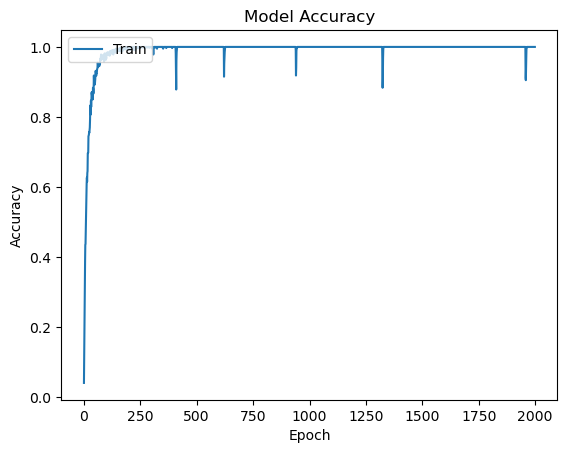

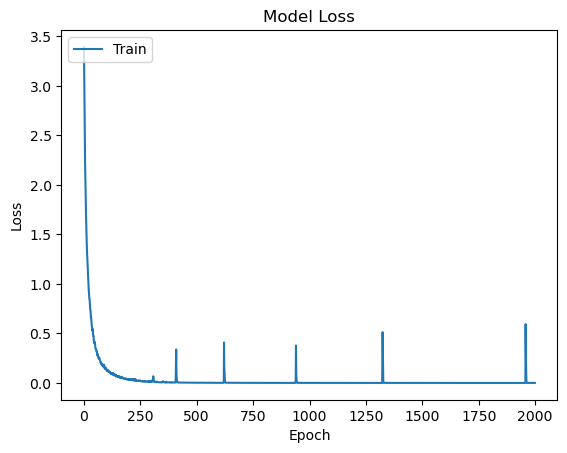

INFO:tensorflow:Assets written to: Final_Tf_mp_model\assets


INFO:tensorflow:Assets written to: Final_Tf_mp_model\assets


In [17]:
# Plot epoch vs accuracy
plt.plot(history.history['categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot epoch vs loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

#saving the model
model.save("Final_Tf_mp_model")

In [18]:
model = tf.keras.models.load_model('Final_Tf_mp_model')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 61, 32)            6080      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 30, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 960)               0         
                                                                 
 dense (Dense)               (None, 30)                28830     
                                                                 
Total params: 34,910
Trainable params: 34,910
Non-trainable params: 0
_________________________________________________________________


In [19]:
res = model.predict(X_test)

print("X_test shape: ", X_test.shape)


5/5 [==============================] - 0s 5ms/step
X_test shape:  (150, 63, 63)


In [20]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

yhat = model.predict(X_test)

5/5 [==============================] - 0s 6ms/step


In [21]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

multilabel_confusion_matrix(ytrue, yhat)

array([[[144,   0],
        [  0,   6]],

       [[143,   0],
        [  0,   7]],

       [[145,   0],
        [  0,   5]],

       [[145,   0],
        [  1,   4]],

       [[145,   1],
        [  0,   4]],

       [[140,   2],
        [  0,   8]],

       [[147,   1],
        [  1,   1]],

       [[145,   0],
        [  0,   5]],

       [[146,   1],
        [  1,   2]],

       [[146,   0],
        [  0,   4]],

       [[141,   1],
        [  0,   8]],

       [[144,   1],
        [  0,   5]],

       [[141,   0],
        [  2,   7]],

       [[143,   0],
        [  0,   7]],

       [[146,   0],
        [  0,   4]],

       [[145,   0],
        [  0,   5]],

       [[148,   0],
        [  1,   1]],

       [[145,   0],
        [  0,   5]],

       [[146,   0],
        [  0,   4]],

       [[145,   0],
        [  0,   5]],

       [[149,   0],
        [  0,   1]],

       [[142,   0],
        [  0,   8]],

       [[146,   0],
        [  0,   4]],

       [[148,   0],
        [  0, 

In [22]:
print("Improved accuracy without validation datatsets", accuracy_score(ytrue, yhat))


Improved accuracy without validation datatsets 0.9466666666666667


In [23]:
mp_hands = mp.solutions.hands
with mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5) as hands:
    vidcap = cv2.VideoCapture('/content/drive/MyDrive/MediaPipe_Data/Test_Video_MediaPipe/love_P5_1.mp4')
    success,frame = vidcap.read()
    count = 0
    test = []
    while success:     
        success,frame = vidcap.read()
        if success:
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            results = hands.process(image)
            if results.multi_hand_landmarks:
                for hand_landmarks in results.multi_hand_landmarks:
                    landmarks = hand_landmarks.landmark
                    landmarks_array = np.array([[landmark.x, landmark.y, landmark.z] for landmark in landmarks])
                    test.append(landmarks_array.flatten())

nptest = np.array([test[:35]])

print("test shape: ", nptest.shape)



test shape:  (1, 0)


In [24]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# # Predict the labels of the test data
# yhat = model.predict(X_test)
# y_pred_classes = np.argmax(yhat, axis=1)

# # Convert the one-hot encoded labels to integers
# y_test_classes = np.argmax(y_test, axis=1)

# Get the classification report
print(classification_report(ytrue, yhat))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           3       1.00      0.80      0.89         5
           4       0.80      1.00      0.89         4
           5       0.80      1.00      0.89         8
           6       0.50      0.50      0.50         2
           7       1.00      1.00      1.00         5
           8       0.67      0.67      0.67         3
           9       1.00      1.00      1.00         4
          10       0.89      1.00      0.94         8
          11       0.83      1.00      0.91         5
          12       1.00      0.78      0.88         9
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         5
          16       1.00      0.50      0.67         2
          17       1.00    

In [25]:
# Get the test accuracy
test_acc = model.evaluate(X_test, y_test)[1]
print("Test accuracy:", test_acc)

5/5 [==============================] - 0s 9ms/step - loss: 0.2228 - categorical_accuracy: 0.9467
Test accuracy: 0.9466666579246521


In [26]:
# Get the test proportion
test_proportion = len(X_test) / (len(X_train) + len(X_test))
print("Test proportion:", test_proportion)

Test proportion: 0.2


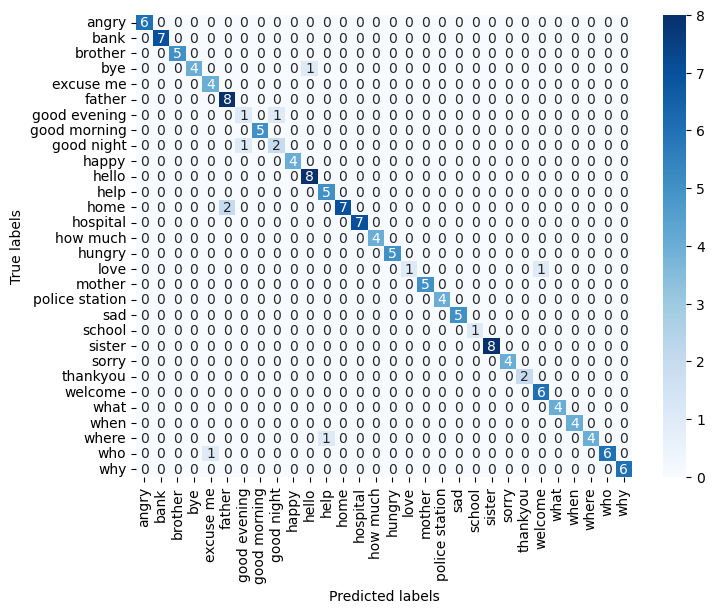

In [27]:
# Get the confusion matrix
cm = confusion_matrix(ytrue, yhat)

# Plot the confusion matrix as an image
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=words, yticklabels=words)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [28]:
# Get the recall (weighted), f1 score (weighted), and precision (weighted)
weighted_metrics = classification_report(ytrue, yhat, output_dict=True)['weighted avg']
print("Weighted recall:", weighted_metrics['recall'])
print("Weighted f1 score:", weighted_metrics['f1-score'])
print("Weighted precision:", weighted_metrics['precision'])

Weighted recall: 0.9466666666666667
Weighted f1 score: 0.9455917013269953
Weighted precision: 0.9534708994708994
